Анализ данных из архива объявлений о продаже квартир в России за 2018-2021 годы

Цели проекта 
1. Анализ динамики цен на недвижимость: исследование изменения цен на квартиры в России за период с 2018 по 2021 годы, включая сезонные колебания, выявление трендов и закономерностей. 
2. Выявление факторов, влияющих на стоимость недвижимости: определение параметров, оказывающих наибольшее влияние на ценообразование.
3. Сравнительный анализ регионов: изучение различий в ценах на недвижимость в разных регионах России. 
4. Визуализация данных: создание наглядных графиков и диаграмм для представления результатов анализа.
   
Датасет скачан из открытого источника kaggle: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

In [1]:
#Первый этап - импорт необходимых библиотек и загрузка датасета.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#При импорте датасета используется параметр parse_dates для корректного считывавния даты.
data = pd.read_csv('Russia_Real_Estate_data.csv', parse_dates = ['date'])
#Чтобы иметь возможность сравнения с исходным датасетом для дальнейшей работы создадим копию таблицы
df = data.copy()

In [3]:
#Посмотрим на корректность загрузки данных, а также оценим масштаб работы
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [4]:
#Оценка корректности определения типов данных колонок
df.dtypes

price                     int64
date             datetime64[ns]
time                     object
geo_lat                 float64
geo_lon                 float64
region                    int64
building_type             int64
level                     int64
levels                    int64
rooms                     int64
area                    float64
kitchen_area            float64
object_type               int64
dtype: object

Изучение данных

В нашем распоряжении данные из сервисов avito.ru и cian.ru — архив объявлений о продаже квартир в России за 2018-2021 годы. 
Всего таблица состоит из 5477006 строк, 13 столбцов и содержит данные следующих типов: float64 (4 столбца), int64 (7 столбцов), object (1 столбец), datetime64 (1 столбец).
Каждая строка соответствует описанию одного объекта недвижимости.

Содержание колонок:

date - дата публикации объявления;
time - время публикации объявления;
geo_lat - широта;
geo_lon - долгота;
region - область;
building_type - тип фасада: 0 - другой, 1 - панельный, 2 - монолитный, 3 - кирпичный, 4 - блочный, 5 - деревянный;
object_type - тип квартиры: 1 - Вторичный рынок недвижимости, 11 - Новостройка;
level - этаж квартиры;
levels - этажность дома;
rooms - количество жилых комнат. Если значение "-1", то это означает "квартира-студия";
area - общая площадь квартиры (м^2);
kitchen_area - площадь кухни (м^2);
price - цена в рублях.

In [5]:
#Проверка наличия пропусков в каждой колонке
df.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [6]:
df.describe()

,price,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5477006,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,2019-11-20 16:33:10.095173120,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
min,-2.144967e+09,2018-02-19 00:00:00,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,2019-03-14 00:00:00,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,2019-10-13 00:00:00,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,2020-07-18 00:00:00,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,2021-05-01 00:00:00,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01
std,2.150752e+07,NaN,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00


Анализ датасета для определения направлений предобработки данных

1. Наименования столбцов соответствуют содержащейся в них информации, а также записаны в корректном формате для дальнейшей работы, предобработка не требуется.
2. Формат данных распознан корректно, за исключением колонки "time"(тип - object), однако в случае с исследованием цен на недвижимость в разрезе 4 лет конкретное время публикации объявления рассматривать нецелесообразно, поэтому данный столбец будет исключен из датасета. Также нет необходимости в таких столбцах как geo_lat, geo_lon(широта и долгота), они также будут исключены из датасета.
3. Пропуски в данных отсутствуют.
4. В данных присутствуют аномальные значения:
    - price: минимальная цена отрицательна, а максимальное значение цены равно ~2 147 484 000 р, требует корректировки;
    - rooms: значение "-2". Значение "-1" допустимо по условию, оно обозначает квартиру - студию, а вот наличие значения "-2" не предусмотрено,        необходима очистка;
    - area: минимальная площадь квартиры составила 0,07 м^2, а максимальная 7856 м^2, требует корректировки;
    - kitchen_area: минимальная площадь кухни составила ~0,01 м^2, а максимальная 9999 м^2 (что даже больше максимального значения площади квартиры), требует корректировки.
5. Содержание остальных столбцов.
    - date: объявления размщены в период с 2018-02-19 по 2021-05-01, аномалий в датах не выявлено;
    - region: содержит цифровую кодировку областей, для удобства необходимо заменить кодировку на наименования областей;
    - building_type: содержит корректные значения от 0 до 5, аномалий не выявлено;
    - level: содержит значения от 1 до 39, аномалий не выявлено, но нужно проверить не превышает ли этаж квартиры указанную этажность здания;
    - levels: содержит значения от 1 до 39, аномалий не выявлено;
    - object_type: содержит значения 1 и 11, что соответствует заявленным, аномалий не выявлено.

In [7]:
#Удалим колонки, которые не понадобятся в дальнейшем анализе: time, geo_lat, geo_lon
df = df.drop(columns = ['time', 'geo_lat', 'geo_lon'])

In [8]:
#Проверим, что удаление прошло успешно
df.columns

Index(['price', 'date', 'region', 'building_type', 'level', 'levels', 'rooms',
       'area', 'kitchen_area', 'object_type'],
      dtype='object')

In [9]:
#Проверка отрицательных аномалий в ценах
df.query('price < 0').describe()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,3.650000e+02,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,-1.738844e+09,2019-09-01 03:09:22.191780864,8089.728767,1.246575,7.175342,10.654795,2.542466,77.226274,11.994384,8.287671
min,-2.144967e+09,2018-09-14 00:00:00,3.000000,0.000000,1.000000,1.000000,-1.000000,22.780000,1.000000,1.000000
25%,-2.114150e+09,2019-03-22 00:00:00,9654.000000,1.000000,7.000000,10.000000,2.000000,56.600000,12.000000,1.000000
50%,-2.041757e+09,2019-05-13 00:00:00,9654.000000,1.000000,8.000000,10.000000,3.000000,87.390000,13.000000,11.000000
75%,-1.669967e+09,2020-01-15 00:00:00,9654.000000,1.000000,8.000000,10.000000,3.000000,87.390000,13.000000,11.000000
max,-4.496730e+07,2021-04-30 00:00:00,13919.000000,5.000000,20.000000,26.000000,6.000000,952.000000,30.000000,11.000000
std,5.351311e+08,NaN,2935.548714,0.798020,2.801480,3.943455,0.852585,50.311775,2.766897,4.452063


Минимальная отрицательная цена составила ~ -2 144 967 000 р, а максимальная ~ - 44 967 300 р. Очевидно, ошибка заключалась не только в постановке "-", все значения ниже нуля не могут являться реальными ценами, поэтому необходимо их полностью устранить.

In [10]:
#Филтруем все значения по столбцу price. Теперь все значения будут больше нуля.
df = df.query('price > 0')

In [11]:
df.price.describe()

count    5.476618e+06
mean     4.538231e+06
std      1.552484e+07
min      1.000000e+00
25%      1.950000e+06
50%      2.990000e+06
75%      4.803150e+06
max      2.147484e+09
Name: price, dtype: float64

Минимальное значение цены составляет 1 р. Необходима дальнейшая обработка.
Рассчитаем цену за квадратный метр для более взвешенного дальнейшего принятия решений.

In [12]:
#Добавляем столбец с ценой за квадратный метр
df.loc[:, 'price_m_square'] = round(df['price'] / df['area'])

In [13]:
df.price_m_square.describe()

count    5.476618e+06
mean     8.217379e+04
std      3.977184e+05
min      0.000000e+00
25%      4.292700e+04
50%      6.100000e+04
75%      9.165000e+04
max      5.000000e+08
Name: price_m_square, dtype: float64

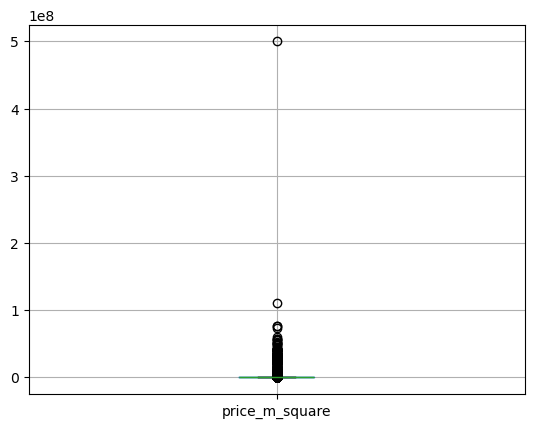

In [14]:
#Построим диаграмму размаха для оценки аномалий
df.boxplot(column = 'price_m_square')
plt.show()

Наблюдаются значительные единичные выбросы, отсечём значения свыше 2 000 000 р/м^2.

In [15]:
df = df.query('price_m_square < 2000000')

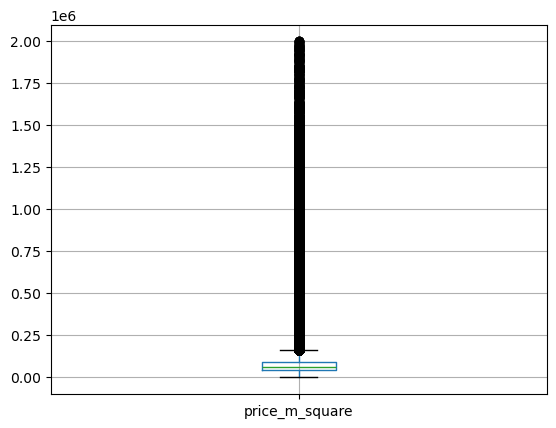

In [16]:
df.boxplot(column='price_m_square')
plt.show()

Всё ещё значимо влияние выбросов, исключим значения менее 200 000 р/м^2.

In [17]:
df = df.query('price_m_square < 200000')

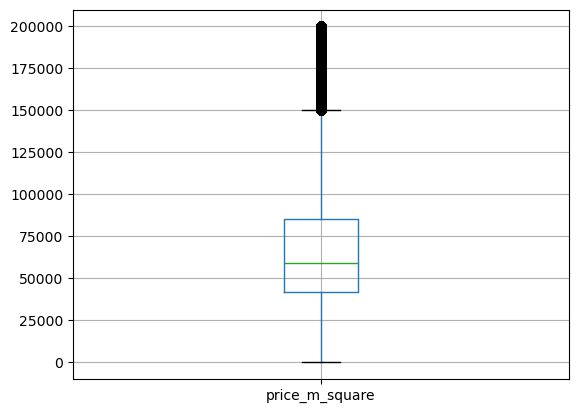

In [18]:
df.boxplot(column = 'price_m_square')
plt.show()

Также исключим экстремально низкие цены менее 10 000р/м^2.

In [19]:
df = df.query('price_m_square > 10000')

In [20]:
#Далее воспользуемся методом межквартильного размаха для удаления оставшихся выбросов
Q1 = df['price_m_square'].quantile(0.25)
Q3 = df['price_m_square'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы
df = df[(df['price_m_square'] >= lower_bound) & (df['price_m_square'] <= upper_bound)]

In [21]:
df[['price','price_m_square']].describe()

,price,price_m_square
count,4.943998e+06,4.943998e+06
mean,3.389252e+06,6.364321e+04
std,2.340872e+06,2.944256e+04
min,5.000000e+04,1.000300e+04
25%,1.850000e+06,4.129000e+04
50%,2.759000e+06,5.757600e+04
75%,4.190000e+06,7.948700e+04
max,2.400000e+08,1.500750e+05


Таким образом, по полю price у нас остались значения от 50 000р до 240 000 000 р. Необходимо проверить экстремальные значения.

In [22]:
#Проверим низкие значения
df.query('price < 150000')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square
1690036,75000,2019-04-27,4007,1,1,1,1,1.00,1.00,1,75000.0
1865444,100000,2019-05-27,6817,1,1,2,1,2.90,1.40,1,34483.0
2205083,50000,2019-07-14,3,5,1,1,1,2.00,2.00,11,25000.0
2414144,105000,2019-08-19,2900,3,1,1,3,5.00,1.50,1,21000.0
2854816,125000,2019-11-08,2604,3,2,8,-1,10.00,3.50,1,12500.0
2954005,130000,2019-11-29,9654,1,8,10,1,8.00,1.00,11,16250.0
2981913,130000,2019-12-03,9654,1,8,10,1,8.00,1.00,11,16250.0
3023841,140000,2019-12-11,6817,5,1,1,1,12.00,2.00,1,11667.0
3040514,130000,2019-12-16,9654,1,8,10,1,8.00,1.00,11,16250.0
3121987,110000,2020-01-12,6817,3,2,2,2,2.00,5.50,1,55000.0


In [23]:
#Данные значения явно являются аномалиями, поэтому можно исключить их из датсета
df = df.query('price > 150000')

In [24]:
#Далее посмотрим аномально высокие значения
df.query('price > 100000000')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square
2501262,234025676,2019-09-03,81,3,16,16,-1,5000.0,100.0,11,46805.0
2649458,110000000,2019-09-27,2661,3,1,3,-2,1000.0,40.0,1,110000.0
4028766,100000300,2020-07-04,81,3,5,5,2,4250.0,15.0,1,23529.0
4377810,240000000,2020-09-12,2843,3,5,9,4,5000.0,99.0,1,48000.0


С учётом количества комнат возможна ошибка в данных, либо речь идёт о крупных земельных участках. В любом случае эти строки можно исключать из дальнейшей обработки.

In [25]:
df = df.query('price < 100000000')

Далее аномальные данные столбца area.
На текущий момент минимальная площадь квартиры, выставленной на продажу в России составляет 6,5 квадратных метров (Источник: https://www.novostroy.su/news/market/samaya-malenkaya-v-rf-kvartira-prodaetsya-v-peterburge-metrazh-krokhi-65-kv-m/). Поэтому все значения ниже 6,5 будут исключены. 
Самая большая квартира составляет 1100 квадратных метров, поэтому все превышающие этот порог значения также будут исключены. (Источник: https://souverain.ru/news/samaya-bolshaya-kvartira-rossii-prodayetsya-na-rublyevke/)

In [26]:
df = df.query('area > 6.5 and area < 1100')

Рассмотрим аномалии столбца kitchen_area. Необходимо исключить все значения, которые превышают общую площадь квартиры.

In [27]:
df = df.query('area > kitchen_area')

Перейдём к обработке колонки rooms. Проверим все уникальные значения.

In [28]:
df.rooms.unique()

array([ 3,  2,  1,  4, -1,  5,  7,  8,  6,  9, -2], dtype=int64)

Некорректное значение, которое не имеет расшифровки - "-2". 

In [29]:
#Проверим сколько строк содержит значение "-2"
df.query('rooms == -2').rooms.count()

145

In [30]:
#140 строк в масштабах нашего исследования вносит незначительный вклад, поэтому целесообразно будет удалить эти строки.
df = df.query('rooms != -2')

Также в данных присутствуют объекты недвижимости с большим колиеством комнат. Необходимо проверить не является ли указанное количество комнат в некоторых случаях ошибкой. Для того, чтобы обнаружить аномальные значения создадим новый столбец с отношением площади квартиры к количеству комнат. 

In [31]:
#При расчете используем модуль, так как среди комнат есть отрицательные значения(квартиры-студии)
df['room_area'] = round(df.area/abs(df.rooms))

In [32]:
df['room_area'].describe()

count    4.941505e+06
mean     3.144805e+01
std      9.896663e+00
min      2.000000e+00
25%      2.400000e+01
50%      3.000000e+01
75%      3.700000e+01
max      8.250000e+02
Name: room_area, dtype: float64

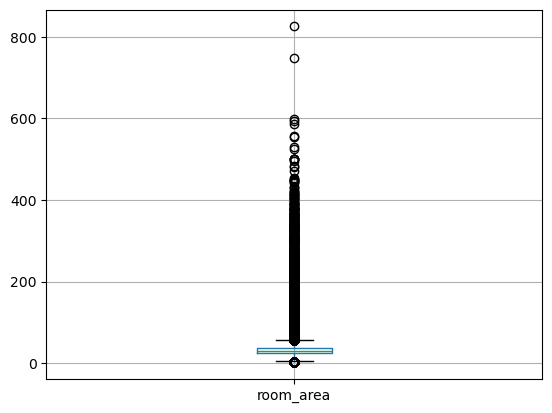

In [33]:
df.boxplot(column = 'room_area')
plt.show()

В данных присутствуют крупные выбросы. Необходимо их исключить. Сначала удалим все значения более 150 м^2 и менее 5 м^2.

In [34]:
df = df.query('room_area > 5 and room_area < 150')

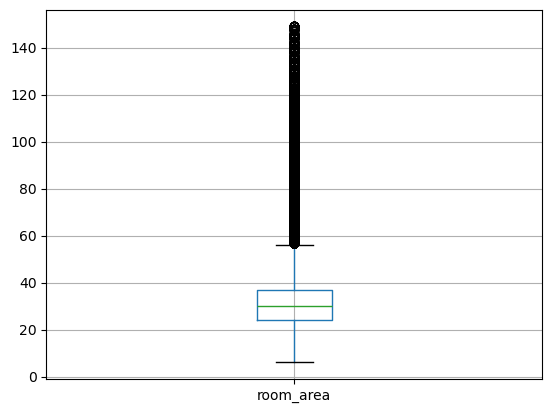

In [35]:
df.boxplot(column = 'room_area')
plt.show()

Ещё остались значительные аномалии, исключим значения выше 70 м^2.

In [36]:
df = df.query('room_area < 70')

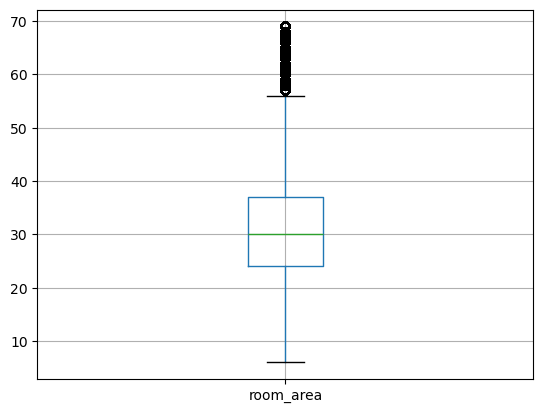

In [37]:
df.boxplot(column='room_area')
plt.show()

Также отфильтруем по площади только крупные квартиры, в которых количество комнат превышает 6. В таких квартирах маловероятно 
встретить комнаты менее 10 м^2.

In [38]:
df = df.drop(df[(df['rooms'] >= 6) & (df['room_area'] < 10)].index)

In [39]:
#Удалим столбец, так как он не понадобится для дальнейшего анализа
df = df.drop(columns = ['room_area'])

Далее добавим наименования регионов.

In [40]:
#Загружаем файл с расшифровкой регионов
region_names = pd.read_csv('regions_id.csv', sep = ";")

In [41]:
#Проверим корректно ли загрузились данные
region_names.head()

,region,region_name
0,11416,Adygey
1,6817,Altay
2,7929,Amur
3,6543,Arkhangel'sk
4,10582,Astrakhan'


In [42]:
#Данные отображаются корректно, теперь необходимо добавить новый столбец в наш датасет
df = df.merge(region_names, on = 'region')

In [43]:
#Проверим появление нового столбца
df[['region', 'region_name']].head()

,region,region_name
0,2661,City of St. Petersburg
1,81,Moskovskaya
2,2871,Nizhegorod
3,2843,Krasnodar
4,81,Moskovskaya


In [44]:
#Посмотрим все уникальные наименования столбца region_name
df.region_name.unique()

array(['City of St. Petersburg', 'Moskovskaya', 'Nizhegorod', 'Krasnodar',
       'Moskva', 'Samara', 'Tatarstan', "Stavropol'", 'Bashkortostan',
       'Sverdlovsk', 'Rostov', 'Komi', 'Chelyabinsk', 'Irkutsk',
       'Leningrad', "Perm'", 'Altay', 'Buryat', "Yaroslavl'", 'Udmurt',
       'Kabardin-Balkar', 'Pskov', 'North Ossetia', 'Kemerovo', 'Chuvash',
       'Mariy-El', 'Mordovia', 'Krasnoyarsk', "Tyumen'", 'Khakass',
       'Novosibirsk', 'Voronezh', 'Karelia', 'Dagestan',
       'Sakha (Yakutia)', 'Chita', 'Sevastopol', 'Kirov', 'Kalmyk',
       'Adygey', 'Karachay-Cherkess', 'Tuva', 'Ingush', 'Gorno-Altay',
       'Belgorod', "Arkhangel'sk", 'Kaluga', "Tver'", 'Penza',
       'Khanty-Mansiy', 'Kamchatka', 'Lipetsk', 'Vladimir',
       'Yamal-Nenets', 'Tomsk', "Ryazan'", 'Chechnya', 'Smolensk',
       'Saratov', 'Vologda', 'Volgograd', 'Tula', 'Crimea', 'Tambov',
       'Murmansk', 'Novgorod', 'Kursk', 'Khabarovsk', 'Bryansk',
       "Astrakhan'", 'Kaliningrad', 'Omsk', 'Kurgan',

In [45]:
df.region_name.nunique() 
#Всего в датасете объявления из 84 субъектов РФ

84

In [46]:
#Теперь проверим этажность. Главный вопрос - не превышает ли указанный этаж квартиры общее количество этажей дома?
df.query('level > levels')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square,region_name
24669,1850000,2018-09-12,3870,3,17,13,1,37.00,10.00,1,50000.0,Krasnoyarsk
33834,1100000,2018-09-13,9654,3,4,1,1,30.00,8.00,1,36667.0,Novosibirsk
109484,700000,2018-09-22,2722,3,2,1,2,40.00,11.00,1,17500.0,Bashkortostan
138774,3200000,2018-09-27,11171,2,4,3,1,31.00,10.00,1,103226.0,Sakha (Yakutia)
154161,1050000,2018-09-28,2843,4,2,1,2,54.00,10.00,1,19444.0,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...
4494407,4750000,2021-01-19,2843,4,11,10,2,54.00,6.00,1,87963.0,Krasnodar
4682490,6984180,2021-03-18,81,3,4,3,2,57.80,11.68,11,120834.0,Moskovskaya
4682494,7164620,2021-03-18,81,3,4,3,2,78.84,11.68,11,90875.0,Moskovskaya
4683053,4136487,2021-03-18,81,3,4,3,1,48.40,9.01,11,85465.0,Moskovskaya


In [47]:
#Всего обнаружено 1000 некорректных значений. Можем исключить их из датасета.
df = df.query('level <= levels')

Для удобства дальнейшей обработки данных следует их обогатить следующими параметрами:
- ввести категоризацию этажей: первый, последний, другой;
- вывести соотношение площади кухни к общей площади квартиры;
- вывести месяц и год публикации объявления.

In [48]:
#Добавим категоризацию этажей
df['level_category'] = df.apply(
    lambda x: 'Первый' if x['level'] == 1 else 'Последний' if x['level'] == x['levels'] else 'Другой',
    axis=1
)

In [49]:
#Проверим корректность данных
df.tail(10)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square,region_name,level_category
4923102,3700000,2021-05-01,7121,3,3,9,1,36.0,8.0,1,102778.0,Kursk,Другой
4923103,2300000,2021-05-01,3106,3,2,2,2,50.0,7.5,1,46000.0,Samara,Последний
4923104,5800000,2021-05-01,2843,2,1,16,2,61.0,12.0,11,95082.0,Krasnodar,Первый
4923105,2600000,2021-05-01,2843,4,1,2,3,63.0,8.0,1,41270.0,Krasnodar,Первый
4923106,1700000,2021-05-01,5282,3,1,3,2,48.0,9.0,1,35417.0,Chelyabinsk,Первый
4923107,650000,2021-05-01,3019,3,2,2,1,42.0,13.0,1,15476.0,Chuvash,Последний
4923108,6400000,2021-05-01,81,3,4,17,3,82.0,10.6,1,78049.0,Moskovskaya,Другой
4923109,7200000,2021-05-01,3446,2,2,3,2,59.0,22.3,11,122034.0,Leningrad,Другой
4923110,9000000,2021-05-01,2900,3,4,5,4,178.0,20.0,1,50562.0,Stavropol',Другой
4923111,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,101734.0,Nizhegorod,Другой


In [50]:
#Добавим соотношение кухни и общей площади квартиры
df['kitchen_part'] = round(df.kitchen_area / df.area * 100)

In [51]:
df.head(5)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square,region_name,level_category,kitchen_part
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,73245.0,City of St. Petersburg,Другой,13.0
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,125181.0,Moskovskaya,Другой,17.0
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,60606.0,Nizhegorod,Другой,15.0
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,48684.0,Krasnodar,Другой,13.0
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,90833.0,Moskovskaya,Другой,17.0


In [52]:
#Добавим отдельные столбцы с месяцем и годом публикации объявления
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

In [53]:
#Проверка полученных значений
df[['date','month', 'year']].sample(10)

,date,month,year
2518533,2019-10-06,10,2019
1837641,2019-06-09,6,2019
1492094,2019-04-11,4,2019
2325948,2019-09-02,9,2019
4631087,2021-03-05,3,2021
4688490,2021-03-19,3,2021
1220097,2019-03-04,3,2019
1975381,2019-07-01,7,2019
3177026,2020-03-11,3,2020
202868,2018-10-08,10,2018


Наш датасет готов к дальнейшему анализу. Посмотрим какие входные данные мы имеем.

In [54]:
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square,region_name,level_category,kitchen_part,month,year
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,73245.0,City of St. Petersburg,Другой,13.0,2,2018
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,125181.0,Moskovskaya,Другой,17.0,2,2018
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,60606.0,Nizhegorod,Другой,15.0,2,2018
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,48684.0,Krasnodar,Другой,13.0,3,2018
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,90833.0,Moskovskaya,Другой,17.0,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923107,650000,2021-05-01,3019,3,2,2,1,42.0,13.0,1,15476.0,Chuvash,Последний,31.0,5,2021
4923108,6400000,2021-05-01,81,3,4,17,3,82.0,10.6,1,78049.0,Moskovskaya,Другой,13.0,5,2021
4923109,7200000,2021-05-01,3446,2,2,3,2,59.0,22.3,11,122034.0,Leningrad,Другой,38.0,5,2021
4923110,9000000,2021-05-01,2900,3,4,5,4,178.0,20.0,1,50562.0,Stavropol',Другой,11.0,5,2021


In [57]:
df.describe()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_m_square,kitchen_part,month,year
count,4.922112e+06,4922112,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06,4.922112e+06
mean,3.377765e+06,2019-11-07 09:29:28.737322240,4.665634e+03,1.949965e+00,5.996354e+00,1.097483e+01,1.730410e+00,5.287616e+01,1.035017e+01,3.842804e+00,6.365787e+04,2.047499e+01,6.630816e+00,2.019341e+03
min,1.550000e+05,2018-02-19 00:00:00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,7.300000e+00,1.000000e-02,1.000000e+00,1.000300e+04,0.000000e+00,1.000000e+00,2.018000e+03
25%,1.850000e+06,2019-03-05 00:00:00,2.722000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.820000e+01,7.000000e+00,1.000000e+00,4.133900e+04,1.400000e+01,3.000000e+00,2.019000e+03
50%,2.750000e+06,2019-09-26 00:00:00,3.230000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.800000e+01,9.300000e+00,1.000000e+00,5.757600e+04,1.900000e+01,7.000000e+00,2.019000e+03
75%,4.169999e+06,2020-07-01 00:00:00,6.817000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,6.290000e+01,1.210000e+01,1.100000e+01,7.948700e+04,2.500000e+01,1.000000e+01,2.020000e+03
max,6.780000e+07,2021-05-01 00:00:00,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,6.020000e+02,1.700000e+02,1.100000e+01,1.500750e+05,1.000000e+02,1.200000e+01,2.021000e+03
std,2.293561e+06,NaN,3.230861e+03,1.055815e+00,4.732589e+00,6.247580e+00,1.058121e+00,2.168192e+01,5.076672e+00,4.510711e+00,2.942115e+04,8.327552e+00,3.537487e+00,8.615678e-01


В нашем распоряжении 4922112 объявлений о продаже объектов недвижимости из 84 субъектов России, опубликованных в период с 19.02.2018 по 01.05.2021. 
Цены на объекты недвижимости варьируют в диапазоне от 155 000р до 67 800 000р, средняя цена составила 3 377 765р, а медианная - 2 750 000р.
Цены за квадратный метр находятся в диапазоне от 10 003р до 150 075р, средняя цена составила 63 657р, а медианная 57 576р.
Количество комнат в объектах недвижимости от 1 до 9, а общая площадь от 7,3м^2 до 602м^2.
Минимальный и максимальный этаж из объявлений - 1 и 39.

Исследование факторов, влияющих на стоимость квартиры
Зависимость стоимости квартиры от общей площади, количества комнат, этажа, типа фасада, рынка(вторичный или новостройка) и региона.
Для выявления зависимости сначала построим матрицу попарной корреляции Пирсона для этих параметров:

In [58]:
factors = ['price', 'price_m_square', 'area', 'rooms', 'level','building_type', 'object_type']
df[factors].corr().style.background_gradient('coolwarm')

,price,price_m_square,area,rooms,level,building_type,object_type
price,1.000000,0.700746,0.663168,0.439775,0.220905,0.029638,0.008723
price_m_square,0.700746,1.000000,0.018468,-0.026595,0.265382,0.017272,0.016820
area,0.663168,0.018468,1.000000,0.721743,0.070321,0.017139,0.011731
rooms,0.439775,-0.026595,0.721743,1.000000,-0.056046,0.055448,-0.148618
level,0.220905,0.265382,0.070321,-0.056046,1.000000,-0.116355,0.230485
building_type,0.029638,0.017272,0.017139,0.055448,-0.116355,1.000000,-0.181883
object_type,0.008723,0.016820,0.011731,-0.148618,0.230485,-0.181883,1.000000


По матрице сразу можно отметить, что больше с ценообразованием связана площадь квартиры, на втором месте количество комнат, 
а на третьем этаж, далее идут тип фасада и тип объекта.
Однако цена за квадратный метр имеет наибольшую корреляцию с этажом и уже после идут такие параметры как общая площадь, тип фасада и тип объекта. Также важно отметить отрицательную корреляцию цены за квадратный метр и количества комнат. В эконом сегменте недвижимости встречаются предложения с небольшой площадью и большим количеством комнат. Возможно, данное обстоятельство и повлекло появление такой корреляции.

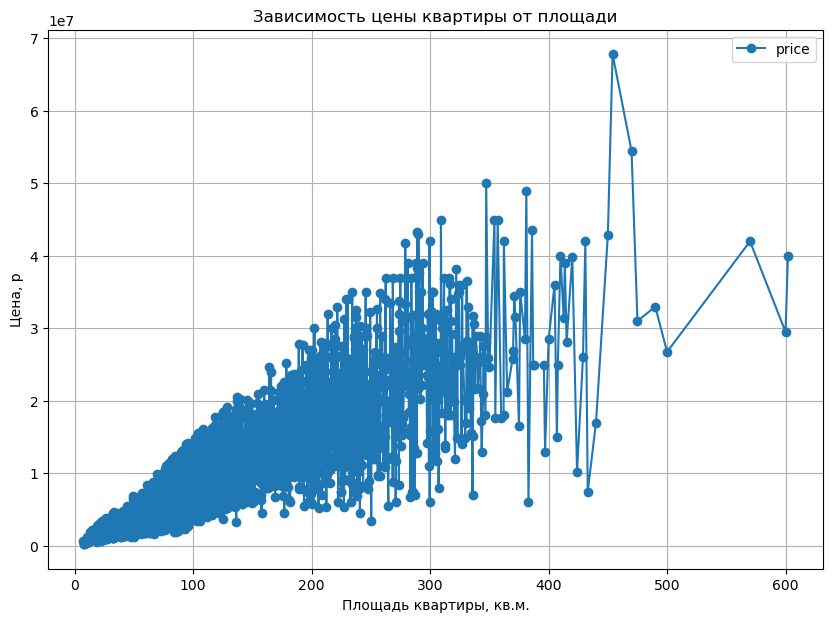

In [80]:
# Построим график зависимости цены от общей площади
df.pivot_table(
        index = 'area',
        values = 'price',
        aggfunc = 'mean'
    ).plot(
        title = 'Зависимость цены квартиры от площади',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Площадь квартиры, кв.м.',
        ylabel = 'Цена, р'
    )
plt.show()

На данном графие мы можем видеть общую тенденцию повышения цены с увеличением общей площади.

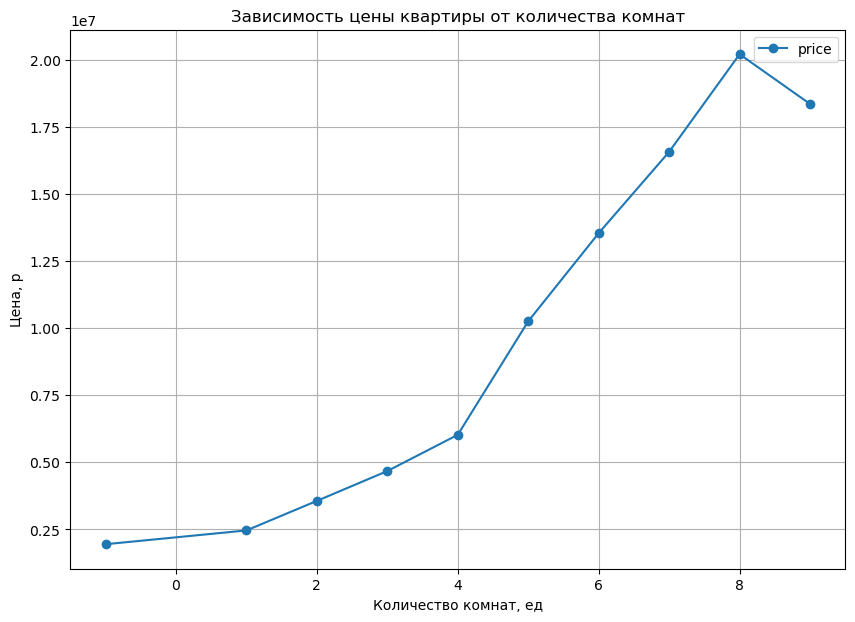

In [82]:
# Построим графики зависимости цены от количества комнат
df.pivot_table(
        index = 'rooms',
        values = 'price',
        aggfunc = 'mean'
    ).plot(
        title = 'Зависимость цены квартиры от количества комнат',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Количество комнат, ед',
        ylabel = 'Цена, р'
    )
plt.show()

Цена от студии до квартиры с 4 комнатами поднимается плавно, а вот от 4 комнат и до 8 наблюдается очень резкий рост цен. Цена на недвижимость с 9 комнатами в среднем ниже, чем на недвижимость с 8 комнатами. Вероятнее всего, квартиры с 9 комнатами в среднем имеют меньшую площадь комнат, а также в целом меньше по площади, что и влечет уменьшение цены.

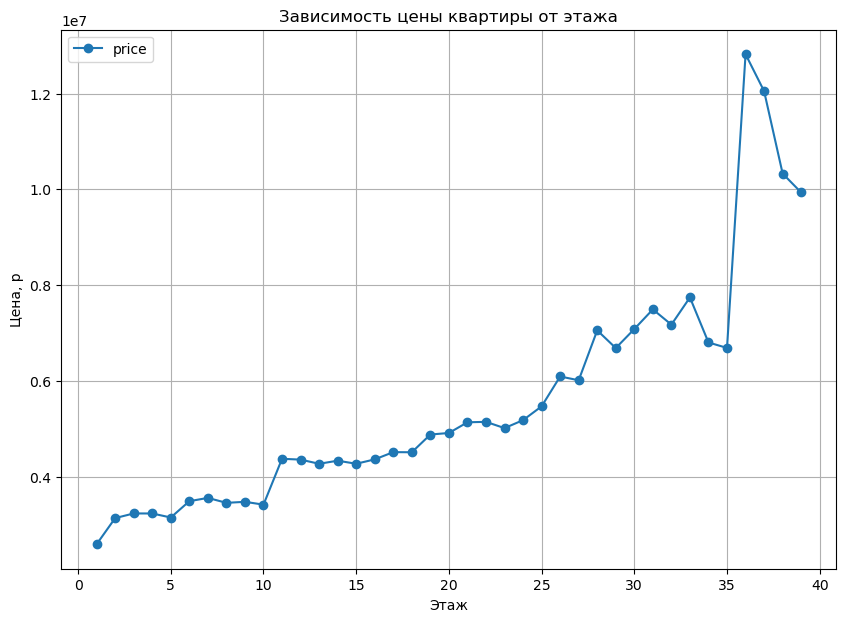

In [83]:
# Построим графики зависимости цены от этажа
df.pivot_table(
        index = 'level',
        values = 'price',
        aggfunc = 'mean'
    ).plot(
        title = 'Зависимость цены квартиры от этажа',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Этаж',
        ylabel = 'Цена, р'
    )
plt.show()

График демонстрирует тенденцию роста цен с увеличением этажа недвижимости, однако можно заметить, что рост периодически сменяется небольшим спадом. Такая ситуация наблюдается на этажах 5, 8, 10, 13, 15, 23, 27, 29, 32, 34, 35, 37, 38, 39. Возможно, это связано с тем, что для продаваемых объектов данные этажи являются последними.
Также можно выделить несколько случаев наиболее резкого роста цены, а именно на 11, 28, 36 этажах. Однако после 36 этажа наблюдается спад цен. Предположительно, эти квартиры меньшей площади.

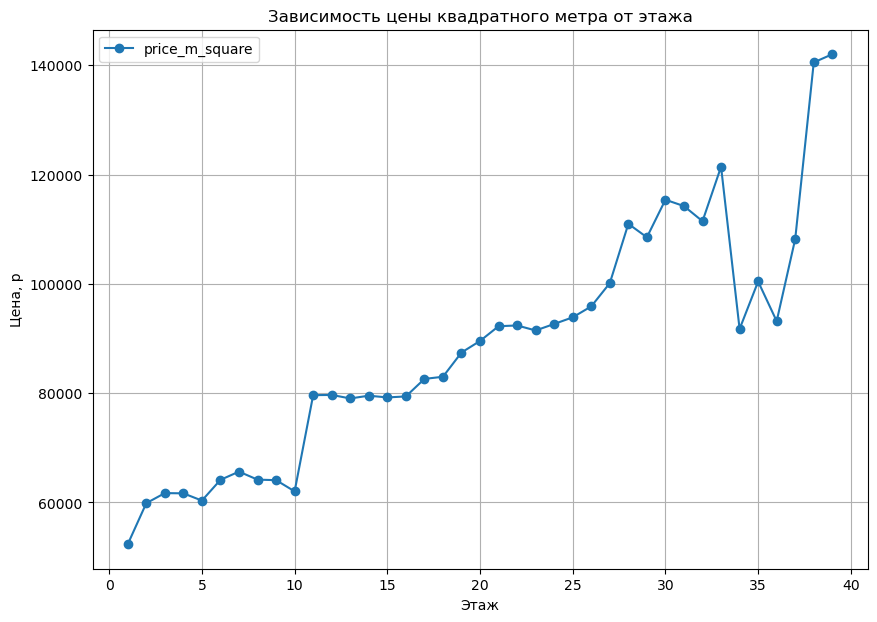

In [84]:
#Построим график зависимости цены за квадратный метр от этажа
df.pivot_table(
        index = 'level',
        values = 'price_m_square',
        aggfunc = 'mean'
    ).plot(
        title = 'Зависимость цены квадратного метра от этажа',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Этаж',
        ylabel = 'Цена, р'
    )
plt.show()


Существуют параллели между графиками зависимости цены квартир и цены за квадратный метр от этажа: явное снижение цены на этажах 5, 10, 29, 32, 34, а также значительное увеличение цены с 11 этажа и на промежутке с 16 по 28. Но после 35 этажа цена за квадратный метр ведёт себя полностью противоположно - сначала наблюдается небольшое снижение, а далее резкий рост. Такие квартиры могут иметь небольшую площадь, поэтому общая цена будет ниже, а вот цена за квадратный метр за счёт этажа выше. 

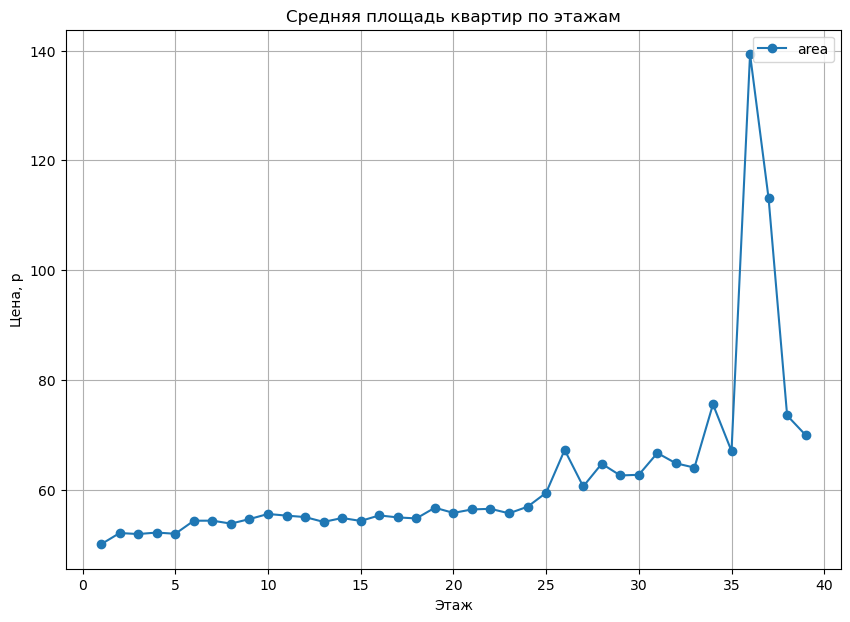

In [86]:
#Для проверки предположения о влиянии на цену площади квартиры на 35+ этажах построим график средней площади квартир для каждого этажа
df.pivot_table(
        index = 'level',
        values = 'area',
        aggfunc = 'mean'
    ).plot(
        title = 'Средняя площадь квартир по этажам',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Этаж',
        ylabel = 'Цена, р'
    )
plt.show()

Данный график подтверждает ранее выдвинутое предположение - на 36 этаже расположена очень крупная квартира, в связи с чем её общая стоимость высока, а цена за квадратный метр ниже, чем на 35. Далее площадь квартир в среднем снижается вместе с ценой, а вот цена квадратного метра наоборот расёт уже за счет этажности.

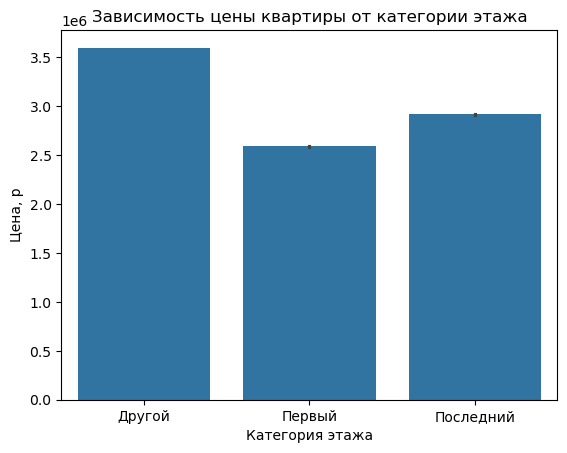

In [85]:
# Построим график зависимости цены от категории этажа
sns.barplot(x = 'level_category', y = 'price', data = df, estimator='mean')
plt.title('Зависимость цены квартиры от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Цена, р')
plt.show()

Цены на недвижимость на первом этаже ниже всего ввиду ряда значительных минусов: более высокий риск кражи, близость к подвальному помещению, посторонний шум и так далее. 
На втором месте цены на квартиры последнего этажа, который также зачастую имеет ряд проблем: высокое влияние погодных условий на температуру в квартире, вероятность поломки крыши и, как следствие, порчи имущества, а также дополнительные трудозатраты при поломке лифта.
Таким образом, самыми дорогими объектами недвижимости являются квартиры, расположенные между первым и последним этажами.

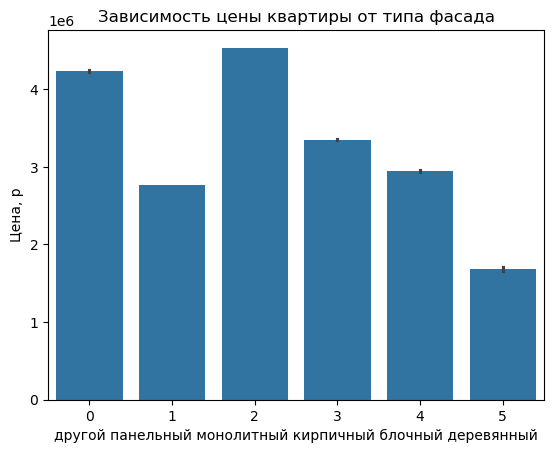

In [87]:
# Построим графики зависимости цены от типа фасада
sns.barplot(x = 'building_type', y = 'price', data = df, estimator='mean')
plt.title('Зависимость цены квартиры от типа фасада')
plt.xlabel('другой панельный монолитный кирпичный блочный деревянный')
plt.ylabel('Цена, р')
plt.show()

Самыми дорогими объектами являются монолитные дома, а вот самыми дешёвыми деревянные. При этом, монолитные здания более, чем в два раза превосходят деревянные. На втором месте расположились постройки с типом фасада "другой". Возможно, причиной этому могла быть недостаточная осведомленность пользователей о типе фасада. На третьем месте дома с кирпичным фасадом, далее блочный и панельный типы.

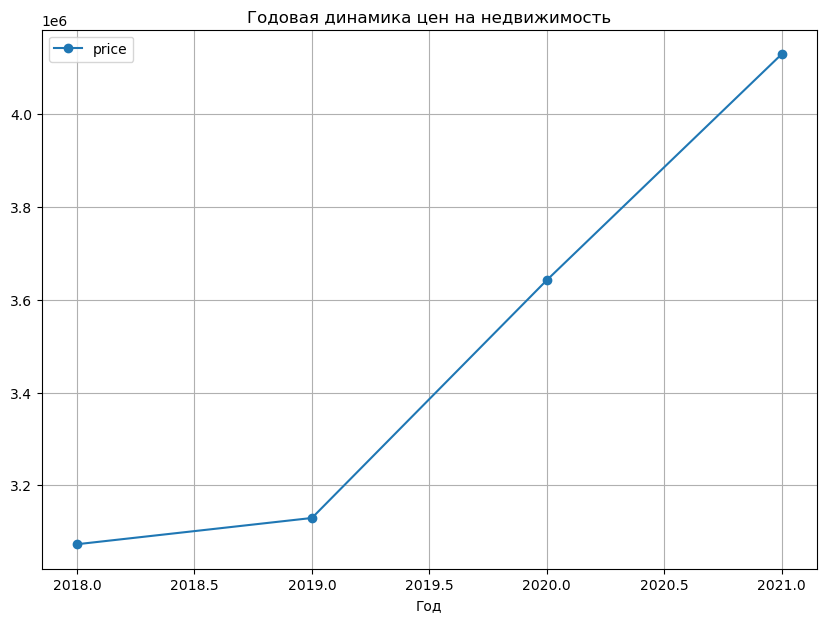

In [67]:
#Построим график годовой динамики цен
df.pivot_table(
        index = 'year',
        values = 'price',
        aggfunc = 'mean'
    ).plot(
        title = 'Годовая динамика цен на недвижимость',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Год'
    )
plt.show()

На протяжении всего периода наблюдений цена на недвижимость росла, однако наиболее резкий рост наблюдался с 2019 года. За 3 года средняя цена на недвижимость выросла на 35%.

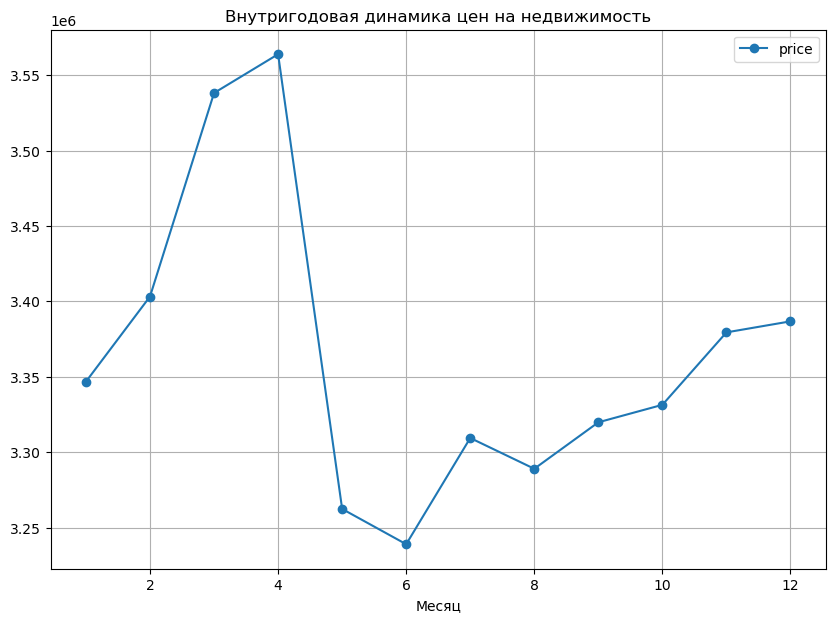

In [68]:
#Построим график внутригодовой динамики цен
df.pivot_table(
        index = 'month',
        values = 'price',
        aggfunc = 'mean'
    ).plot(
        title = 'Внутригодовая динамика цен на недвижимость',
        figsize = (10, 7),
        grid = True,
        style = 'o-',
        xlabel = 'Месяц'
    )
plt.show()

Максимальная цена наблюдается в апреле. Данная тенденция может быть обусловлена повышением спроса ввиду желания потребителей успеть сделать ремонт в новом месте жительства в тёплое время года. Наименьшая цена приходится на май и июнь, вероятно, из-за резкого падения спроса, связанного с началом сезона отпусков. 

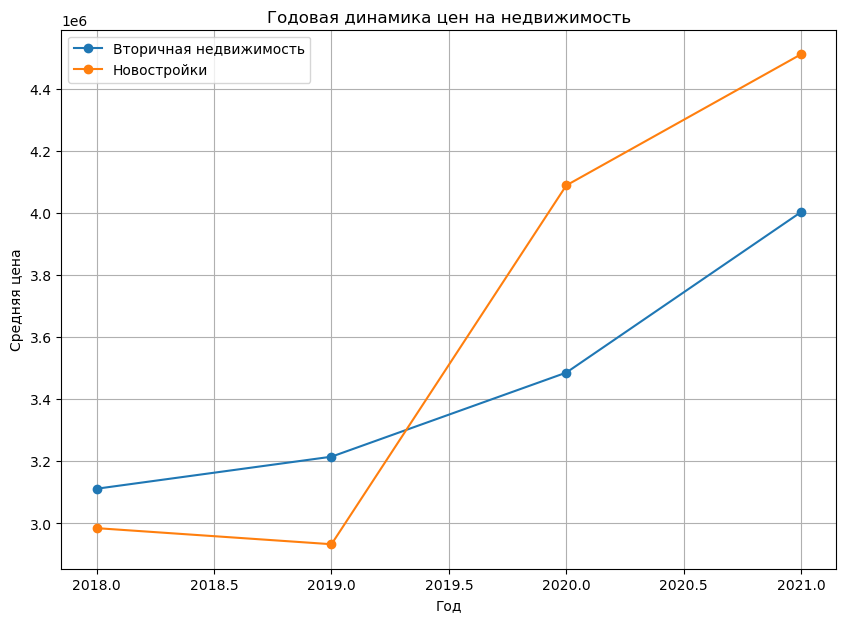

In [69]:
#Построим график внутригодовой динамики цен в разрезе типа недвижимости (вторичный рынок, новостройки)
pivot_secondary = df[df['object_type'] == 1].pivot_table(
    index='year',
    values='price',
    aggfunc='mean'
)
pivot_new_building = df[df['object_type'] == 11].pivot_table(
    index='year',
    values='price',
    aggfunc='mean'
)

plt.figure(figsize=(10, 7))
plt.plot(pivot_secondary.index, pivot_secondary['price'], marker='o', label='Вторичная недвижимость')
plt.plot(pivot_new_building.index, pivot_new_building['price'], marker='o', label='Новостройки')

plt.title('Годовая динамика цен на недвижимость')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.legend()
plt.show()

На данном графике наблюдается интересная тенденция - до 2019 года цена на вторичную недвижимость была выше, чем на новостройки, однако во втором квартале 2019 года ситуация начала стремительно меняться и цены на новостройки в среднем стали стабильно превосходить цены на вторичное жилье.

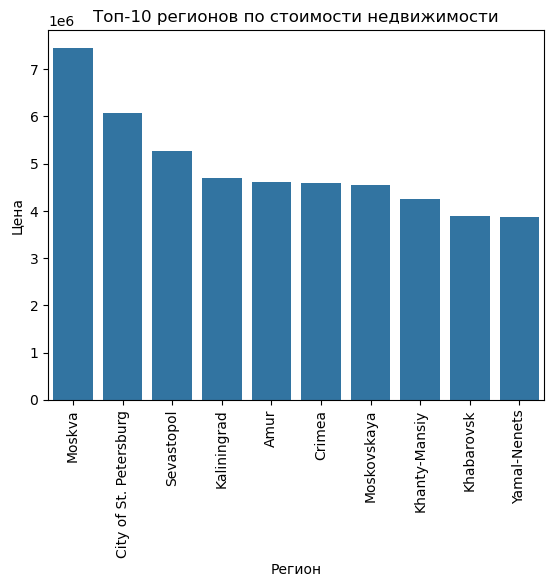

In [75]:
#Построим график топ-10 регионов по стоимости недвижимости
top_price = df.groupby('region_name', as_index = False)\
              .agg({'price':'mean'})\
              .sort_values('price', ascending = False)\
              .head(10)
sns.barplot(x = 'region_name', y = 'price', data = top_price)
plt.title('Топ-10 регионов по стоимости недвижимости')
plt.xlabel('Регион')
plt.ylabel('Цена')
plt.xticks(rotation = 90)
plt.show()

Самые дорогие квартиры в Москве, на втором месте Санкт-Петербург, а на третьем Севастополь. При этом Московская область расположилась лишь на 7 месте. 

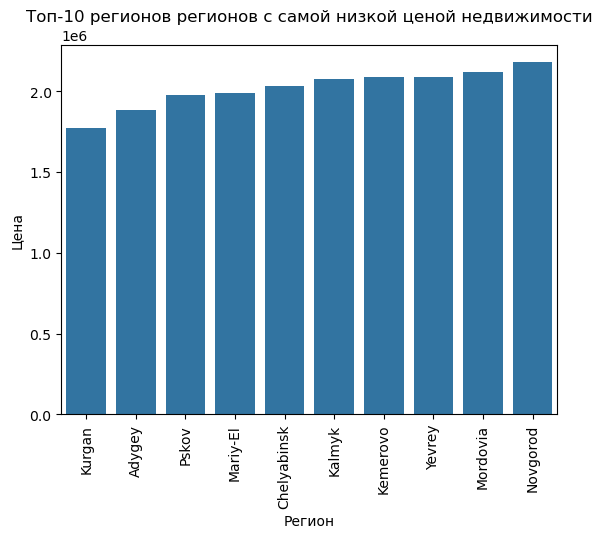

In [77]:
#Построим график топ-10 регионов с самой низкой ценой недвижимости
top_cheap_price = df.groupby('region_name', as_index = False)\
              .agg({'price':'mean'})\
              .sort_values('price', ascending = True)\
              .head(10)
sns.barplot(x = 'region_name', y = 'price', data = top_cheap_price)
plt.title('Топ-10 регионов регионов с самой низкой ценой недвижимости')
plt.xlabel('Регион')
plt.ylabel('Цена')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Самая дешёвая недвижимость находится в Курганской области, далее идут Адыгея, Псковская область, республика Марий Эл и Челябинская область.

Выводы

1. Годовая динамика цен: средняя цена на недвижимость выросла на 35% за 4 года. Особенно резкий рост наблюдался в период с 2019 года.
Сезонные колебания цен: максимальные цены наблюдаются в апреле, что может быть связано с повышением спроса перед летним сезоном для своевременного завершения ремонта в теплое время года. Минимальные цены приходятся на май и июнь из-за начала отпускного сезона и падения спроса.
Цены на объекты недвижимости варьируют от 155 000 до 67 800 000 рублей, что указывает на широкий спектр предложений на рынке. Средняя цена составила
3 377 765р, а медианная - 2750000р.

2. Факторы, влияющие на ценообразование.
Наибольшее влияние на стоимость квартиры оказывает общая площадь, за ней следуют количество комнат и этаж.

Этажность. Цена за квадратный метр имеет наибольшую корреляцию с этажом, что может быть связано с предпочтениями покупателей к более высоким этажам. Квартиры на первом этаже имеют самые низкие цены из-за рисков кражи и близости к подвальным помещениям. Квартиры на последнем этаже также имеют свои недостатки, что делает их менее привлекательными. Наиболее дорогими являются квартиры, расположенные между первым и последним этажами.

Тип фасада. Самыми дорогими объектами недвижимости являются квартиры с монолитным типом фасада, а самыми дешевыми – с деревянным. 

Сравнение вторичного рынка и новостроек. До 2019 года цены на вторичную недвижимость были выше, но с начала второго квартала 2019 года ситуация изменилась, и цены на новостройки начали стабильно превышать стоимость вторичного жилья.

3. Региональный анализ.
Топ-10 регионов с самой дорогой недвижимостью: Москва, Санкт-Петербург, Севастополь, Калининградская, Амурская области, Крым, Московская область, Ханты-Манскийский автономный округ, Хабаровский край, Ямало-Ненецкий автономный округ.

Топ-10 регионов с самой низкой ценой на недвижимость: Курганская область, Республика Адыгея, Псковская область, Республика Марий Эл, Челябинская область, Республика Калмыкия, Кемеровская область, Еврейская автономная область, Республика Мордовия, Новгородская область.
